# M4 chatGPT - 20 Features

In [44]:
pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [46]:
import pandas as pd
import numpy as np

def get_dataset(filepath):
    df = pd.read_csv(filepath)
    #print(df.head())
    X_list = []
    y_list = []
    human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
    machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

    df_human = df.loc[:, human]
    df_human['class'] = 0
    df_machine = df.loc[:, machine]
    df_machine['class'] = 1

    human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
    machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

    df_human = df_human.rename(columns=human)
    df_machine = df_machine.rename(columns=machine)

    full_df = pd.concat([df_human, df_machine], ignore_index=True)
    
    for i in range(len(full_df.columns)-2):
        X = full_df.iloc[:,i:i+2]
        #print(X.head())
        y = full_df.iloc[:,-1]
        X_list.append(X)
        y_list.append(y)

    return X_list, y_list

# XGBoost classifier trained and tested on M4 chatGPT

In [99]:
def xgboost_train(X_train, y_train, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(10, 6))
    lr = 0.01
    weight = 4.5
    evalset = [(X_train, y_train), (X_val,y_val)]
    xgb_classifier = XGBClassifier(n_estimators=500,
                                use_label_encoder=False,
                                eval_metric="logloss",
                                early_stopping_rounds=5,
                                n_jobs=-1,
                                eta=lr,
                                reg_lambda=1,
                                min_child_weight=weight)
    xgb_classifier.fit(X_train, y_train,
                    eval_set=evalset,
                    verbose=False)
    results = xgb_classifier.evals_result()
    yhat = xgb_classifier.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: %.3f' % score)

    plt.plot(results['validation_0']['logloss'], label='train')
    plt.plot(results['validation_1']['logloss'], label='validation')
    values = list(X_train.columns.values)
    title = ' '.join(values)
    plt.title('Loss vs. Epoch for ' + title )
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return xgb_classifier, score

In [49]:
def performance_test(xgb_classifier, X_test_list, y_test_list):
    y_pred_list = []
    for i in range(X_test_list):
        y_pred = xgb_classifier[i].predict(X_test_list[i])
        

        # Compute confusion matrix
        cm = confusion_matrix(y_test_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show(block=False)

# Test on paraphrased chatGPT

In [50]:
def performance_chatgpt(xgb_classifier):
    gpt_para_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_paraphrased_test_feature.csv'
    X_gpt_para_list, y_gpt_para_list = get_dataset(gpt_para_path)
    for i in range(len(X_gpt_para_list)):
        y_pred = xgb_classifier[i].predict(X_gpt_para_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_gpt_para_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

# Test on M4 Bloomz

In [51]:
def performance_bloomz(xgb_classifier):
    bloomz_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_bloomz_test_feature.csv'
    X_bloomz_list, y_bloomz_list = get_dataset(bloomz_path)
    for i in range(len(X_bloomz_list)):
        y_pred = xgb_classifier[i].predict(X_bloomz_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_bloomz_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

## Test on cohere

In [52]:
def performance_cohere(xgb_classifier):
    path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_cohere_test_feature.csv'
    X_cohere_list, y_cohere_list= get_dataset(path)
    for i in range(len(X_cohere_list)):
        y_pred = xgb_classifier[i].predict(X_cohere_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_cohere_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

## Test on Davinci

In [53]:
def performance_cohere(xgb_classifier):
    path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_davinci_test_feature.csv'
    X_davinci_list, y_davinci_list= get_dataset(path)
    for i in range(len(X_davinci_list)):

        y_pred = xgb_classifier[i].predict(X_davinci_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_davinci_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

## Test on Flant5

In [54]:
def performance_cohere(xgb_classifier):
    path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_flant5_test_feature.csv'
    X_flant_list, y_flant_list= get_dataset(path)
    for i in range(len(X_flant_list)):
        y_pred = xgb_classifier[i].predict(X_flant_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_flant_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

In [55]:
train_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_train_feature.csv'
X_train, y_train = get_dataset(train_path)

In [56]:
val_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_validation_feature.csv'
X_val, y_val = get_dataset(val_path)

In [57]:
test_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_test_feature.csv'
X_test, y_test = get_dataset(test_path)

In [58]:
print(len(X_train[0]), len(X_test[0]), len(X_val[0]))
print(len(y_train[0]), len(y_test[0]), len(y_val[0]))

3840 1200 960
3840 1200 960


['no_sentence', 'num_words']
Accuracy: 0.920


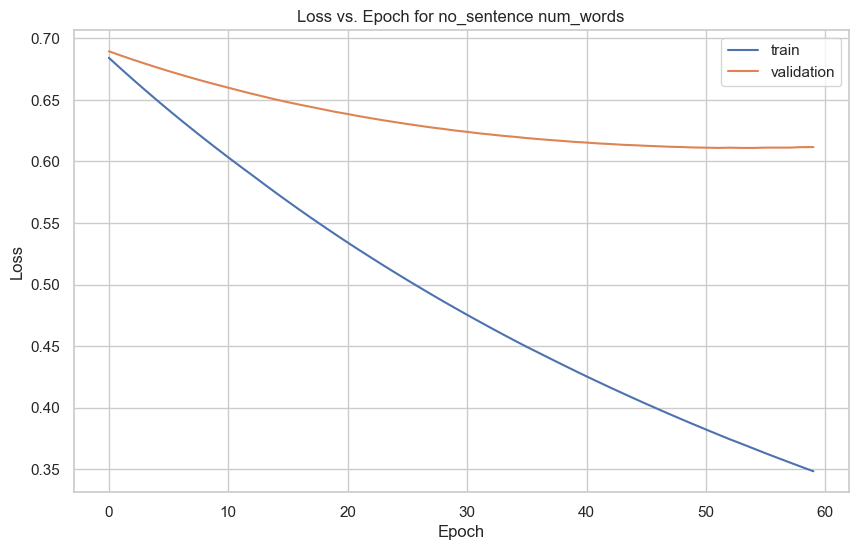

['num_words', 'character0']
Accuracy: 0.779


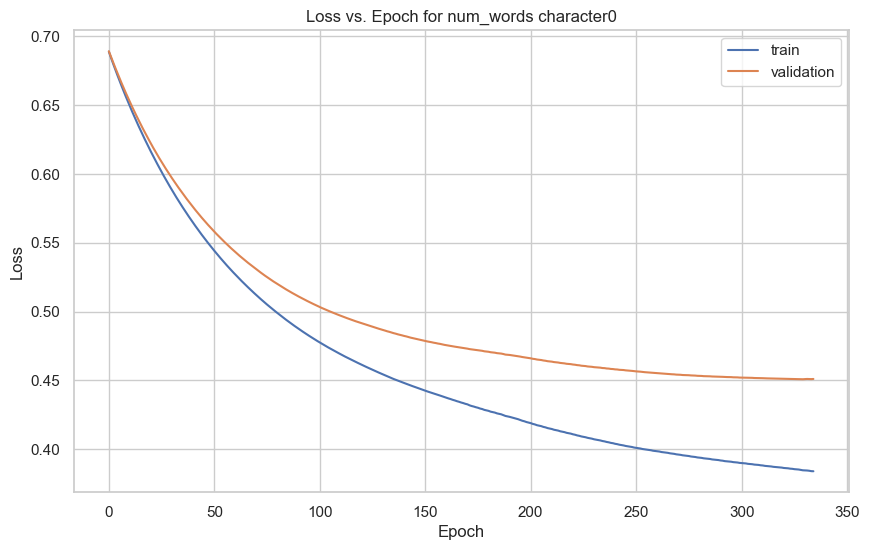

['character0', 'character1']
Accuracy: 0.819


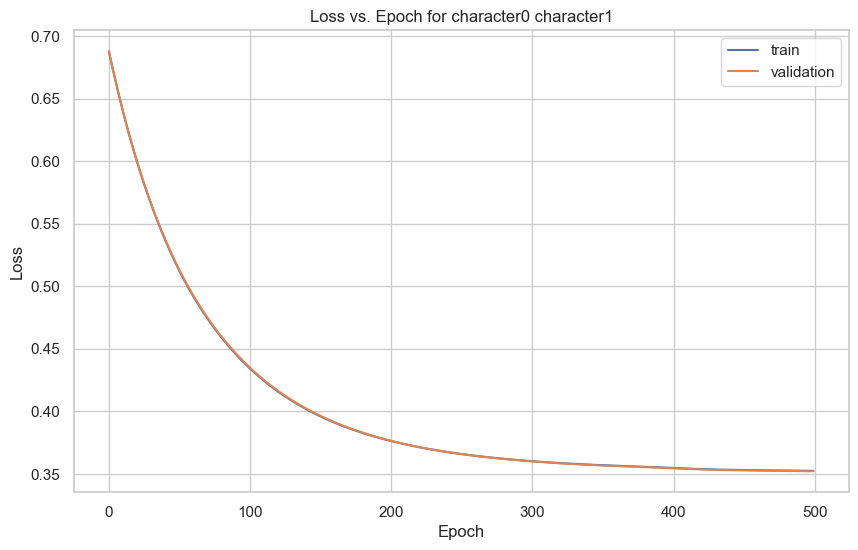

['character1', 'character2_3']
Accuracy: 0.818


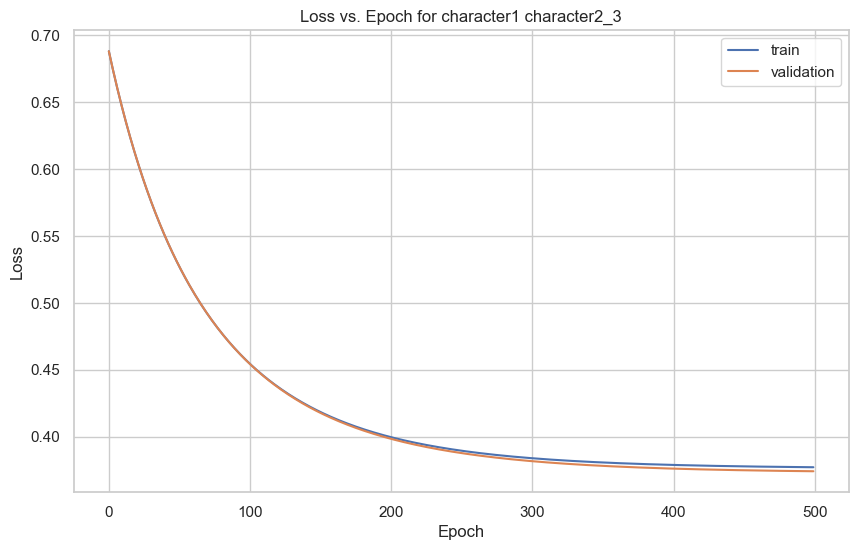

['character2_3', 'character4']
Accuracy: 0.619


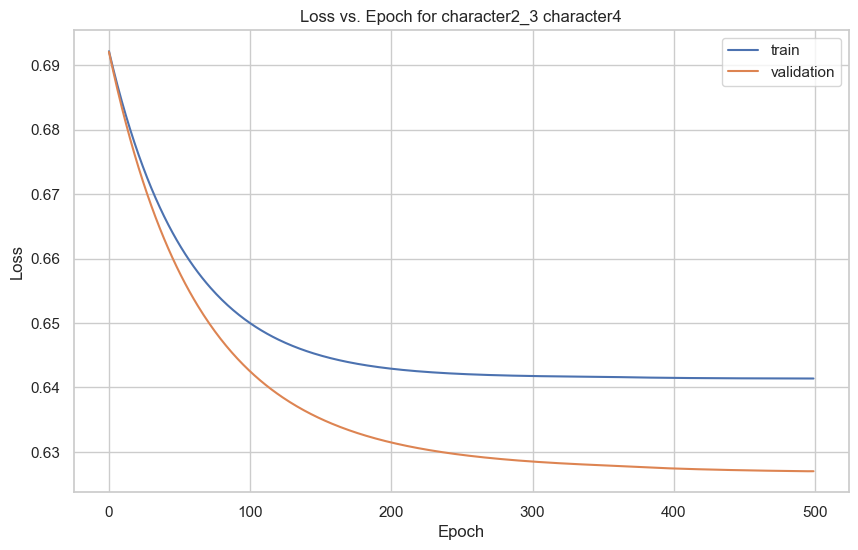

['character4', 'character5']
Accuracy: 0.560


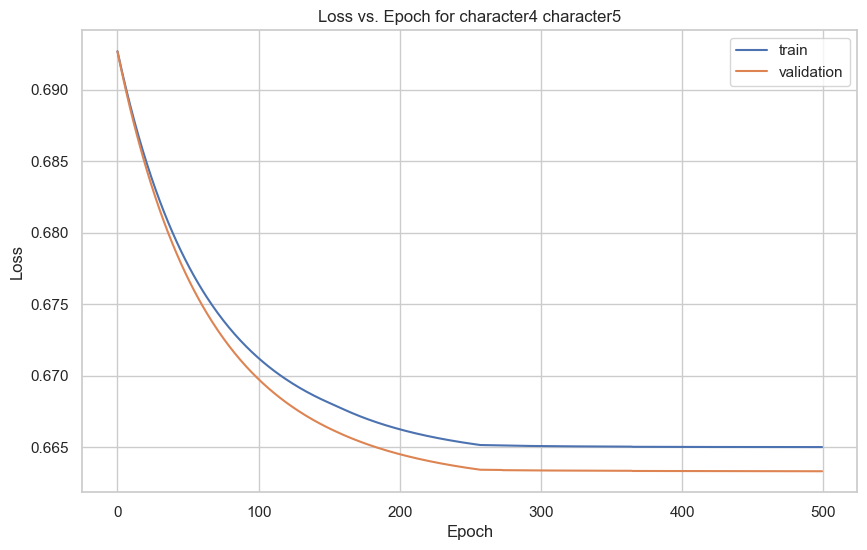

['character5', 'std_dev']
Accuracy: 0.688


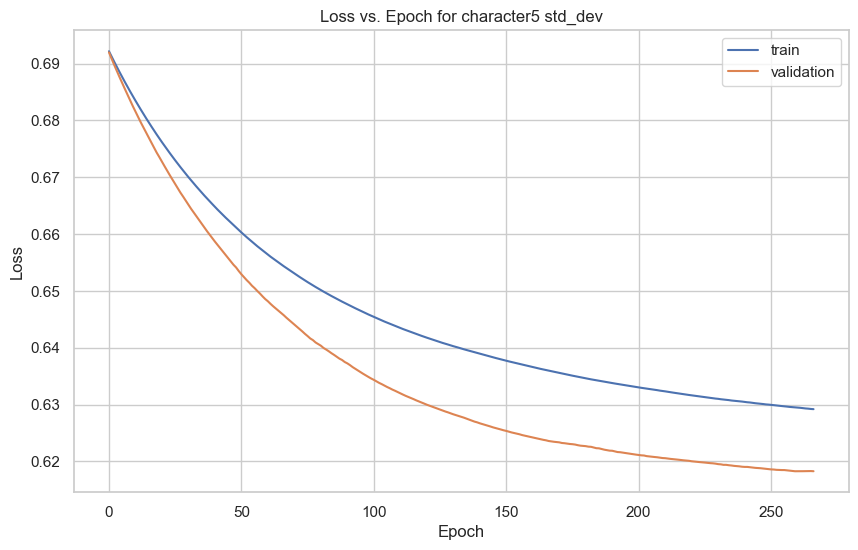

['std_dev', 'sent_len_diff']
Accuracy: 0.747


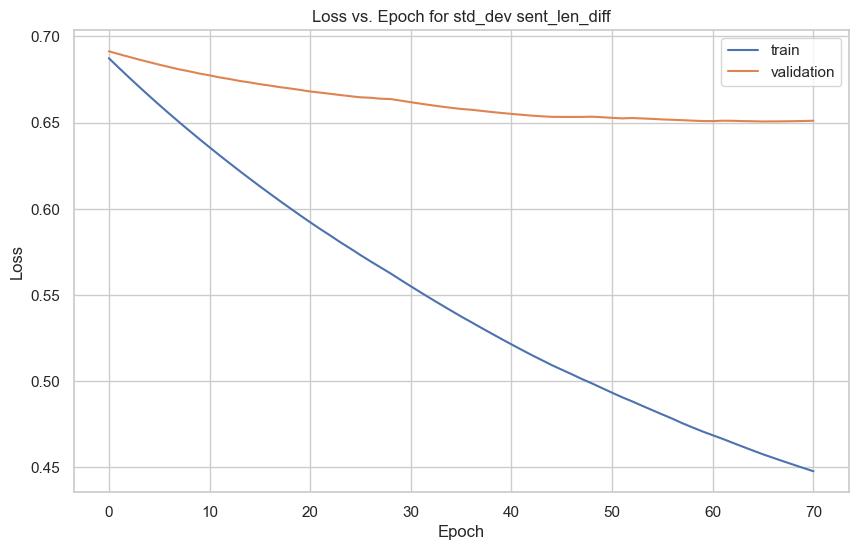

['sent_len_diff', 'count_short_sentences_in_paragraphs']
Accuracy: 0.751


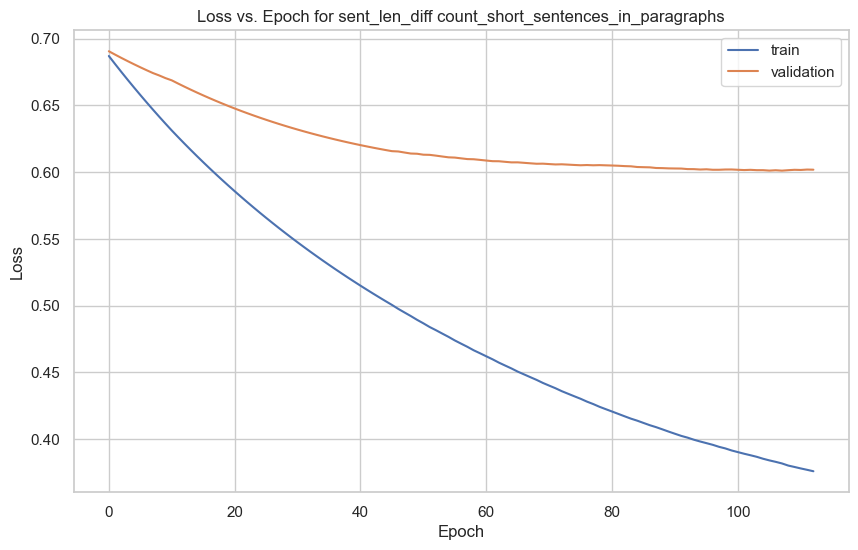

['count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs']
Accuracy: 0.748


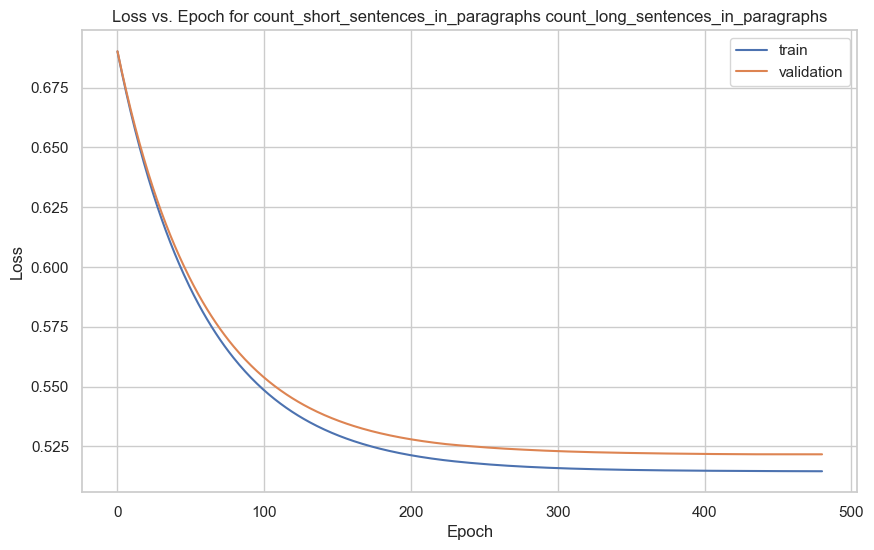

['count_long_sentences_in_paragraphs', 'check_word0']
Accuracy: 0.708


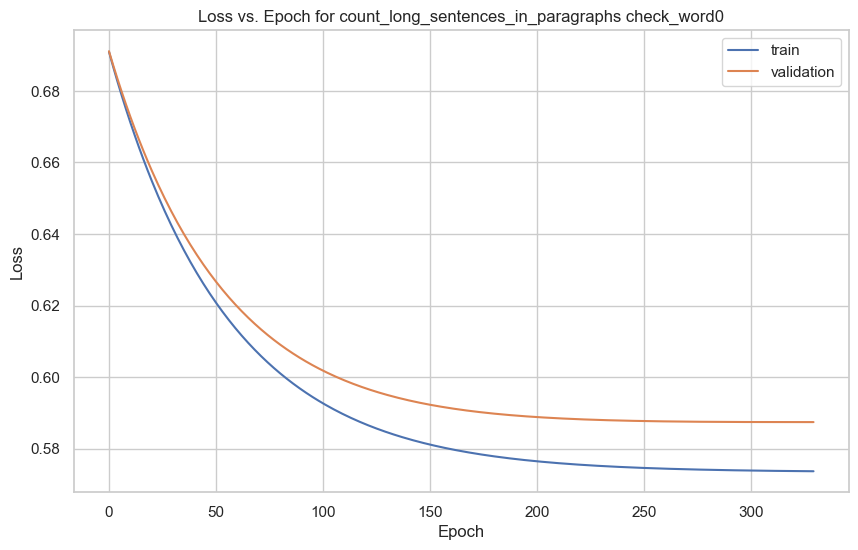

['check_word0', 'check_word1']
Accuracy: 0.500


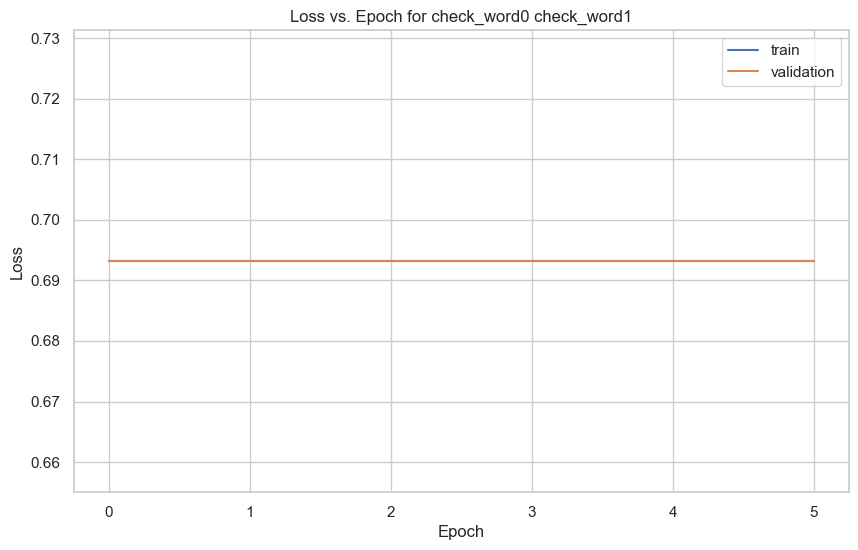

['check_word1', 'check_word2_3']
Accuracy: 0.500


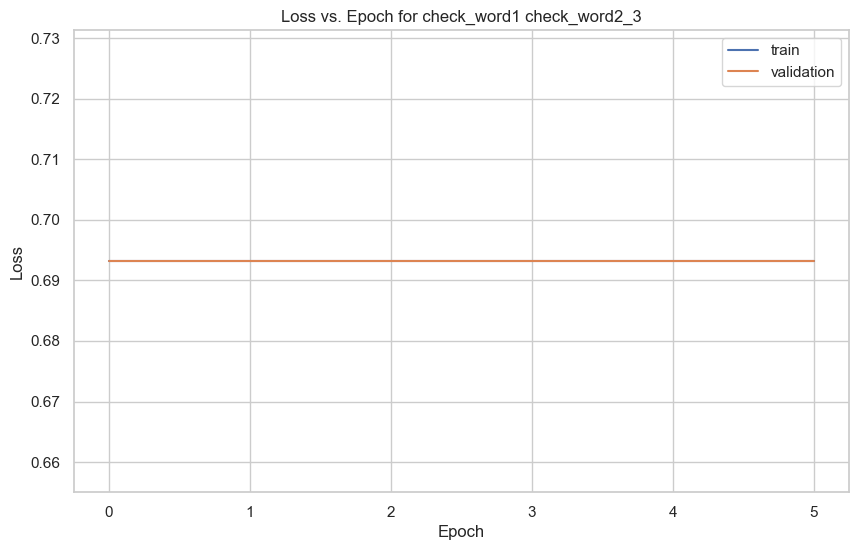

['check_word2_3', 'check_word3']
Accuracy: 0.500


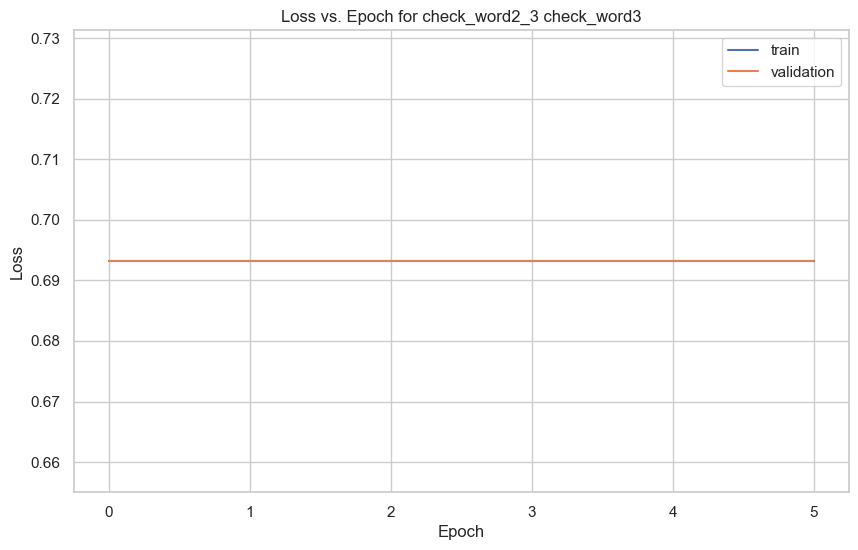

['check_word3', 'check_word4']
Accuracy: 0.500


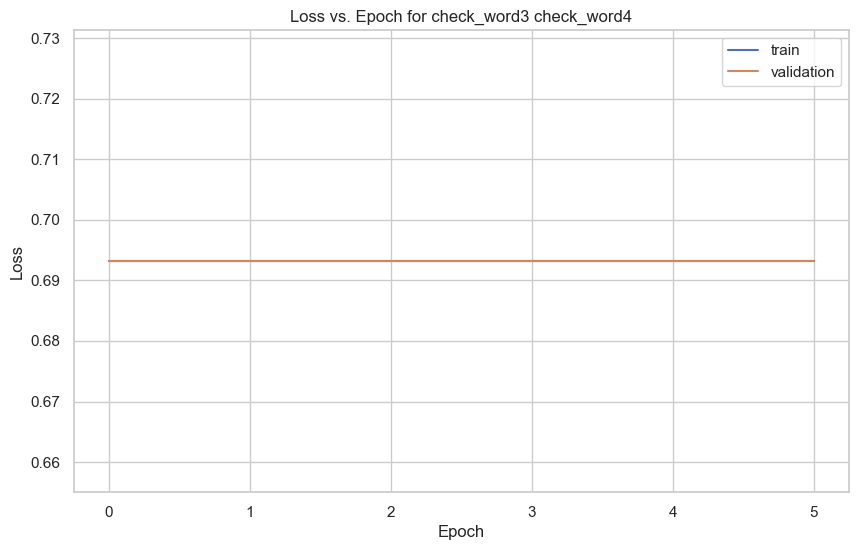

['check_word4', 'check_word5']
Accuracy: 0.500


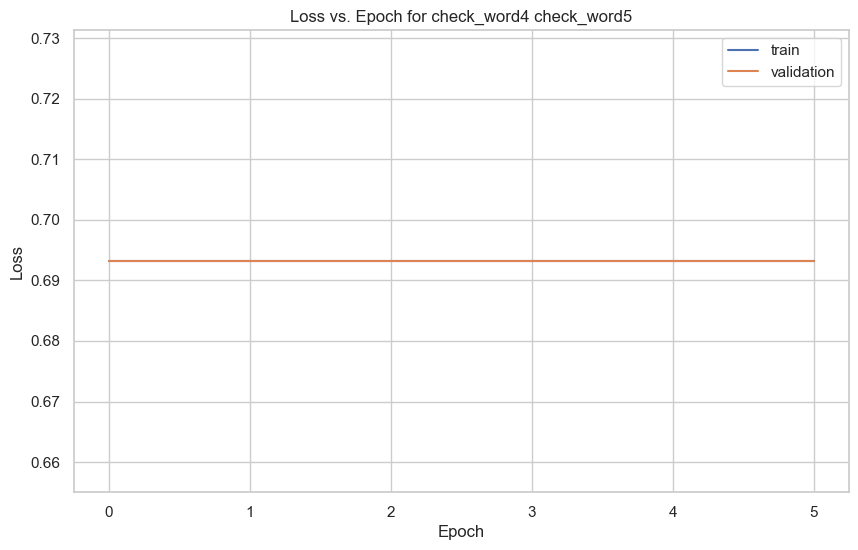

['check_word5', 'check_num']
Accuracy: 0.785


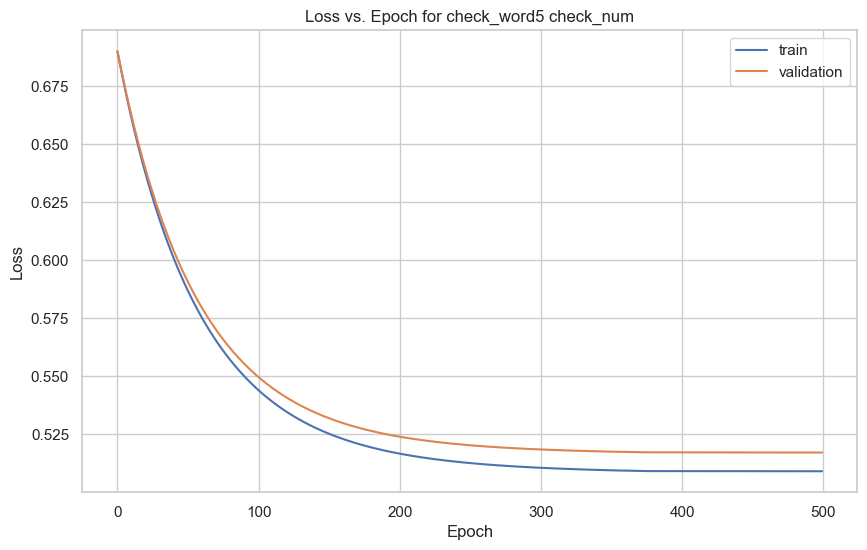

['check_num', 'check_capitals']
Accuracy: 0.840


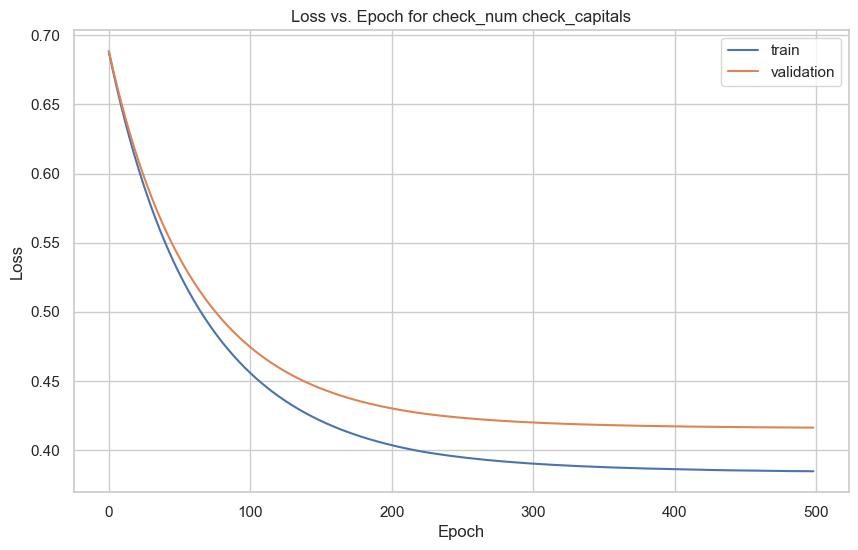

['check_capitals', 'check_et']
Accuracy: 0.745


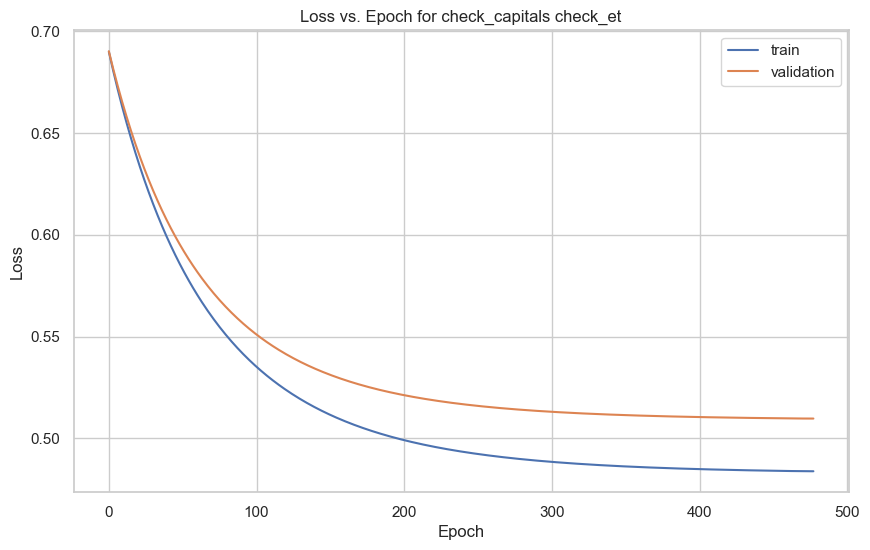

In [100]:
xgb_pairwise_classifiers = []
for i in range(len(X_train)):
    print(list(X_train[i].columns.values))
    xgb_pairwise_classifiers.append(xgboost_train(X_train[i], y_train[i], X_val[i], y_val[i], X_test[i], y_test[i]))

In [ ]:
performance_test(xgb_pairwise_classifiers, X_test, y_test)